                                                                                              Francesca and Hilal
                                                                                                MidTerm Project
This project is created and shared by the mentioned authors, with each joint author enjoying an equal interest in the undivided whole.

# Diamonds Analysis
                                                                                              

#### The data is scrapped from Australian Diamond Importers website on 24th Feb 2022. It includes diamond features, like shape, size, colour, cut, clarity, and other features and the price in Australian dollars (excluding GST).
#### The data is a good candidate for regression models to predict the price based on diamond features.



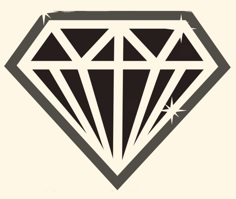


#### Data description
-  price: min:200 AUD; max:1.449.881 AUD.
-  shape: Princess, Cushion, Heart, Pear, Oval, Marquise, Emerald, Radiant, Cushion Modified, Asscher, Round. 
-  cut: Fair, Good, Very Good, Excellent, Ideal.
-  color: M (worst), L, K J, I, H, G, F, E, D (best).
-  fluor intensity: None, Faint, Very Slight, Slight, Medium, Strong, Very Strong.
-  clarity: I3 (worst), I2, I1, SI3, SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best).
-  symmetry: Very Good, Excellent, Good, Fair, Poor.
-  polish: Very Good, Excellent, Good, Fair, Poor.
-  girdle min: XTN (Extremely Thin), VTN, TN, STN, M, STK, TK, VTK, XTK (Extremely Thick).
-  girdle max: XTN (Extremely Thin), VTN, TN, STN, M, STK, TK, VTK, XTK (Extremely Thick).
-  culet size: N (Nano), VS, S, M, SL, L, VL, EL (Extremely Large).
-  depth percentage: min: 0.0; max: 98.7.
-  table percentage: min: 0.0; max: 94.0.
-  carat:  min: 0.80 carat; max: 19.35 carat.
-  length: 0.00 mm; max: 93.66 mm.
-  width: 0.00 mm; max: 62.3 mm.
-  depth: 0.00 mm; max: 76.3 mm.
-  data size: 26.6 Mb; 219704 rows; 27 columns: float64(6), int64(2), object(19).







## Table of Content

##### Modeling project based on analyzing diamonds by their cut, color, clarity, price, and other attributes.

                                                                                              
#### GOALS
- Diamonds dataset exploration, cleaning and editing.
- Linear Regression modeling on diamonds properties to predict the prices.
- Data visualization

#### DATA ANALYSIS STEPS
#### Exploration, Cleaning, Editing
- Read and Open the dataset file
- Check the data info
- Checking max and min values for important features
- Standardizing the column names
- Dropping the less important information (columns)
- Rearranging columns
- Data Subsetting
- Statistical summary of numerical columns
- Removing Duplicates
- Identify percentage of null values per column
- Dropping columns which contain more than 70% null values
- Removing Outliers
- Separate categorical and numerical data to check correlations
- Plotting the Histograms of Numerical Values
- Heatmaps to check correlations between numerical values
- Data BoxPlotting
- Getting dummys from categorical values and drop the first column

#### Modelling
- Split the Numerical Data in X and y, train and test sets
- Standardize the numerical values
- Transforming the arrays resulting from the standardization in DataFrames
- Split the Categorical-Dummy values in train and test sets
- Concatenate numerical and categorical X sets
- Modeling using Statsmodels
- Modeling using Scikit Learn
- Making scatter plots of Residuals
- Seaborn Residual plot
- Calculating MSE and MAE
- Features importance


#### DATA VISUALIZATION
- Transfer data on Tableau for visual analysis.




### Importing the Libraries in Python

In [3965]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd





### Read and Open the dataset file

In [3966]:
diamonds=pd.read_csv('diamonds.csv')
diamonds

,diamond_id,shape,size,color,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,clarity,cut,...,girdle_min,girdle_max,culet_size,culet_condition,fluor_color,fluor_intensity,lab,total_sales_price,eye_clean,date
0,131328926,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,...,M,M,N,NaN,NaN,None,IGI,200,NaN,2022-02-24
1,131704776,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Very Good,...,STK,STK,N,NaN,NaN,None,IGI,200,NaN,2022-02-24
2,131584417,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,...,TN,M,NaN,NaN,NaN,None,IGI,200,NaN,2022-02-24
3,131584416,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,...,M,STK,NaN,NaN,NaN,None,IGI,200,NaN,2022-02-24
4,131613644,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Very Good,...,STK,STK,N,NaN,NaN,None,IGI,200,NaN,2022-02-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219699,135619262,Round,10.65,E,NaN,NaN,NaN,NaN,VS1,Excellent,...,M,STK,N,NaN,NaN,None,GIA,1210692,NaN,2022-02-24
219700,135122237,Radiant,5.17,NaN,Green,NaN,None,Fancy Light,VS2,NaN,...,TK,XTK,NaN,NaN,NaN,None,GIA,1292500,NaN,2022-02-24
219701,135553116,Round,18.07,E,NaN,NaN,NaN,NaN,VS1,Excellent,...,TN,M,N,NaN,NaN,None,GIA,1315496,NaN,2022-02-24
219702,114752541,Princess,0.90,NaN,Red,NaN,NaN,Fancy,SI2,NaN,...,XTN,VTK,N,NaN,NaN,Faint,GIA,1350000,NaN,2022-02-24


In [3967]:
# identify diamonds with fair cut

Fair_cut=diamonds[diamonds['cut']=='Fair']
Fair_cut

,diamond_id,shape,size,color,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,clarity,cut,...,girdle_min,girdle_max,culet_size,culet_condition,fluor_color,fluor_intensity,lab,total_sales_price,eye_clean,date
5420,72036940,Round,0.37,NaN,Brown,NaN,NaN,Faint,VS2,Fair,...,M,VTK,N,NaN,NaN,None,GIA,567,NaN,2022-02-24
93299,135122218,Round,0.69,NaN,Yellow,NaN,NaN,Light,SI2,Fair,...,TN,STK,NaN,NaN,NaN,None,GIA,1491,NaN,2022-02-24
110082,111634793,Round,1.00,NaN,Brown,NaN,NaN,Very Light,SI2,Fair,...,TN,VTK,N,Pointed,NaN,Very Slight,IGI,1980,NaN,2022-02-24
144254,76390950,Round,0.86,NaN,Brown,NaN,NaN,Very Light,VS1,Fair,...,TK,XTK,N,NaN,Blue,Strong,GIA,3483,Yes,2022-02-24
176689,131612763,Round,1.47,NaN,Yellow,NaN,NaN,Fancy Light,SI2,Fair,...,NaN,NaN,NaN,NaN,NaN,None,IGI,6722,NaN,2022-02-24


#### Check the data info

In [3968]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219704 entries, 0 to 219703
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   diamond_id                   219704 non-null  int64  
 1   shape                        219704 non-null  object 
 2   size                         219704 non-null  float64
 3   color                        210542 non-null  object 
 4   fancy_color_dominant_color   9164 non-null    object 
 5   fancy_color_secondary_color  1062 non-null    object 
 6   fancy_color_overtone         2038 non-null    object 
 7   fancy_color_intensity        9162 non-null    object 
 8   clarity                      219704 non-null  object 
 9   cut                          159097 non-null  object 
 10  symmetry                     219704 non-null  object 
 11  polish                       219704 non-null  object 
 12  depth_percent                219704 non-null  float64
 13 

### Checking max and min values for important features

In [3969]:
diamonds['total_sales_price'].min()

200

In [3970]:
diamonds['total_sales_price'].max()

1449881

In [3971]:
# check all properties of the diamond with higher price

Fair_cut=diamonds[diamonds['total_sales_price']==1449881]
Fair_cut

,diamond_id,shape,size,color,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,clarity,cut,...,girdle_min,girdle_max,culet_size,culet_condition,fluor_color,fluor_intensity,lab,total_sales_price,eye_clean,date
219703,129630500,Pear,10.03,NaN,Yellow,NaN,NaN,Fancy Vivid,VVS2,NaN,...,NaN,NaN,NaN,NaN,NaN,None,GIA,1449881,NaN,2022-02-24


In [3972]:
diamonds['depth_percent'].max()

98.7

In [3973]:
diamonds['depth_percent'].min()

0.0

In [3974]:
diamonds['table_percent'].min()

0.0

In [3975]:
diamonds['table_percent'].max()

94.0

In [3976]:
diamonds['size'].max()

19.35

In [3977]:
# check all properties of the diamond with higher price

Fair_cut=diamonds[diamonds['size']==19.35]
Fair_cut

,diamond_id,shape,size,color,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,clarity,cut,...,girdle_min,girdle_max,culet_size,culet_condition,fluor_color,fluor_intensity,lab,total_sales_price,eye_clean,date
219516,135789209,Asscher,19.35,L,NaN,NaN,NaN,NaN,SI1,NaN,...,TK,TK,N,NaN,NaN,None,GIA,390096,NaN,2022-02-24


In [3978]:
diamonds['size'].min()

0.08

In [3979]:
diamonds['meas_length'].max()

93.66

In [3980]:
diamonds['meas_length'].min()

0.0

In [3981]:
diamonds['meas_width'].max()

62.3

In [3982]:
diamonds['meas_width'].min()

0.0

In [3983]:
diamonds['meas_depth'].max()

76.3

In [3984]:
diamonds['meas_depth'].min()

0.0

### Standardizing the column names

All the column names are standardized and we don't need to make any changes but for practical reasons we make shorter 2 column names.

In [3985]:
# method 1: 

diamonds.rename(columns={'fancy_color_dominant_color':'fancy_color_dominant', 'fancy_color_secondary_color':'fancy_color_secondary'}, inplace=True)
diamonds


,diamond_id,shape,size,color,fancy_color_dominant,fancy_color_secondary,fancy_color_overtone,fancy_color_intensity,clarity,cut,...,girdle_min,girdle_max,culet_size,culet_condition,fluor_color,fluor_intensity,lab,total_sales_price,eye_clean,date
0,131328926,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,...,M,M,N,NaN,NaN,None,IGI,200,NaN,2022-02-24
1,131704776,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Very Good,...,STK,STK,N,NaN,NaN,None,IGI,200,NaN,2022-02-24
2,131584417,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,...,TN,M,NaN,NaN,NaN,None,IGI,200,NaN,2022-02-24
3,131584416,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,...,M,STK,NaN,NaN,NaN,None,IGI,200,NaN,2022-02-24
4,131613644,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Very Good,...,STK,STK,N,NaN,NaN,None,IGI,200,NaN,2022-02-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219699,135619262,Round,10.65,E,NaN,NaN,NaN,NaN,VS1,Excellent,...,M,STK,N,NaN,NaN,None,GIA,1210692,NaN,2022-02-24
219700,135122237,Radiant,5.17,NaN,Green,NaN,None,Fancy Light,VS2,NaN,...,TK,XTK,NaN,NaN,NaN,None,GIA,1292500,NaN,2022-02-24
219701,135553116,Round,18.07,E,NaN,NaN,NaN,NaN,VS1,Excellent,...,TN,M,N,NaN,NaN,None,GIA,1315496,NaN,2022-02-24
219702,114752541,Princess,0.90,NaN,Red,NaN,NaN,Fancy,SI2,NaN,...,XTN,VTK,N,NaN,NaN,Faint,GIA,1350000,NaN,2022-02-24


In [3986]:
# method 2 with the function:

def rename_columns(diamonds):
    diamonds.rename(columns={'size':'carat','fancy_color_dominant_color':'fancy_color_dominant','fancy_color_secondary_color':'fancy_color_secondary'}, inplace=True )
    return diamonds
rename_columns(diamonds)


,diamond_id,shape,carat,color,fancy_color_dominant,fancy_color_secondary,fancy_color_overtone,fancy_color_intensity,clarity,cut,...,girdle_min,girdle_max,culet_size,culet_condition,fluor_color,fluor_intensity,lab,total_sales_price,eye_clean,date
0,131328926,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,...,M,M,N,NaN,NaN,None,IGI,200,NaN,2022-02-24
1,131704776,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Very Good,...,STK,STK,N,NaN,NaN,None,IGI,200,NaN,2022-02-24
2,131584417,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,...,TN,M,NaN,NaN,NaN,None,IGI,200,NaN,2022-02-24
3,131584416,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,...,M,STK,NaN,NaN,NaN,None,IGI,200,NaN,2022-02-24
4,131613644,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Very Good,...,STK,STK,N,NaN,NaN,None,IGI,200,NaN,2022-02-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219699,135619262,Round,10.65,E,NaN,NaN,NaN,NaN,VS1,Excellent,...,M,STK,N,NaN,NaN,None,GIA,1210692,NaN,2022-02-24
219700,135122237,Radiant,5.17,NaN,Green,NaN,None,Fancy Light,VS2,NaN,...,TK,XTK,NaN,NaN,NaN,None,GIA,1292500,NaN,2022-02-24
219701,135553116,Round,18.07,E,NaN,NaN,NaN,NaN,VS1,Excellent,...,TN,M,N,NaN,NaN,None,GIA,1315496,NaN,2022-02-24
219702,114752541,Princess,0.90,NaN,Red,NaN,NaN,Fancy,SI2,NaN,...,XTN,VTK,N,NaN,NaN,Faint,GIA,1350000,NaN,2022-02-24


### Dropping the less important information (columns)

In [3987]:
# method 1:

# diamonds.drop(columns=['diamond_id', 'date'], inplace=True)
# diamonds

In [3988]:
# method 2 with the function:

def drop_columns(diamonds):
    diamonds.drop(columns=['diamond_id', 'date', 'lab'], inplace=True)
    return diamonds

drop_columns(diamonds)

,shape,carat,color,fancy_color_dominant,fancy_color_secondary,fancy_color_overtone,fancy_color_intensity,clarity,cut,symmetry,...,meas_width,meas_depth,girdle_min,girdle_max,culet_size,culet_condition,fluor_color,fluor_intensity,total_sales_price,eye_clean
0,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,Very Good,...,2.87,1.79,M,M,N,NaN,NaN,None,200,NaN
1,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Very Good,Very Good,...,2.89,1.78,STK,STK,N,NaN,NaN,None,200,NaN
2,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,Very Good,...,2.90,1.77,TN,M,NaN,NaN,NaN,None,200,NaN
3,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,Very Good,...,2.88,1.78,M,STK,NaN,NaN,NaN,None,200,NaN
4,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Very Good,Very Good,...,2.83,1.82,STK,STK,N,NaN,NaN,None,200,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219699,Round,10.65,E,NaN,NaN,NaN,NaN,VS1,Excellent,Excellent,...,14.18,8.66,M,STK,N,NaN,NaN,None,1210692,NaN
219700,Radiant,5.17,NaN,Green,NaN,None,Fancy Light,VS2,NaN,Very Good,...,8.81,5.71,TK,XTK,NaN,NaN,NaN,None,1292500,NaN
219701,Round,18.07,E,NaN,NaN,NaN,NaN,VS1,Excellent,Excellent,...,17.10,10.20,TN,M,N,NaN,NaN,None,1315496,NaN
219702,Princess,0.90,NaN,Red,NaN,NaN,Fancy,SI2,NaN,Good,...,4.90,3.47,XTN,VTK,N,NaN,NaN,Faint,1350000,NaN


### Rearranging columns

In [3989]:
list(diamonds.columns)

['shape',
 'carat',
 'color',
 'fancy_color_dominant',
 'fancy_color_secondary',
 'fancy_color_overtone',
 'fancy_color_intensity',
 'clarity',
 'cut',
 'symmetry',
 'polish',
 'depth_percent',
 'table_percent',
 'meas_length',
 'meas_width',
 'meas_depth',
 'girdle_min',
 'girdle_max',
 'culet_size',
 'culet_condition',
 'fluor_color',
 'fluor_intensity',
 'total_sales_price',
 'eye_clean']

In [3992]:
diamonds = diamonds[[
    'shape',
    'carat',
    'clarity',
    'cut',
    'symmetry',
    'polish',
    'depth_percent',
    'table_percent',
    'meas_length',
    'meas_width',
    'meas_depth',
    'girdle_min',
    'girdle_max',
    'culet_size',
    'culet_condition',
    'eye_clean',
    'color',
    'fancy_color_dominant',
    'fancy_color_secondary',
    'fancy_color_overtone',
    'fancy_color_intensity',
    'fluor_color',
    'fluor_intensity',
    'total_sales_price',
 ]]

diamonds.head()

,shape,carat,clarity,cut,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,...,culet_condition,eye_clean,color,fancy_color_dominant,fancy_color_secondary,fancy_color_overtone,fancy_color_intensity,fluor_color,fluor_intensity,total_sales_price
0,Round,0.09,VVS2,Excellent,Very Good,Very Good,62.7,59.0,2.85,2.87,...,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,None,200
1,Round,0.09,VVS2,Very Good,Very Good,Very Good,61.9,59.0,2.84,2.89,...,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,None,200
2,Round,0.09,VVS2,Excellent,Very Good,Very Good,61.1,59.0,2.88,2.90,...,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,None,200
3,Round,0.09,VVS2,Excellent,Very Good,Very Good,62.0,59.0,2.86,2.88,...,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,None,200
4,Round,0.09,VVS2,Very Good,Very Good,Excellent,64.9,58.5,2.79,2.83,...,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,None,200


In [3993]:
# Dropping rows which contain 1-3 samples

#diamonds = diamonds[diamonds['cut']!='Fair']
#diamonds = diamonds[diamonds['cut']!='None']
#diamonds = diamonds[diamonds['cut']!='Ideal']

#diamonds

### Data Subsetting
##### Check if the content of the categorical columns contain different defined data. Return unique values and value count.

In [3994]:
diamonds['shape'].unique()

array(['Round', 'Pear', 'Oval', 'Marquise', 'Princess', 'Emerald',
       'Heart', 'Cushion', 'Radiant', 'Cushion Modified', 'Asscher'],
      dtype=object)

In [3995]:
diamonds['cut'].unique()

array(['Excellent', 'Very Good', nan, 'Good', 'Fair', 'None', 'Ideal'],
      dtype=object)

In [3996]:
diamonds['clarity'].unique()

array(['VVS2', 'VVS1', 'I1', 'VS1', 'VS2', 'IF', 'SI2', 'I2', 'SI1',
       'SI3', 'I3'], dtype=object)

In [3997]:
diamonds['symmetry'].unique()

array(['Very Good', 'Excellent', 'Good', 'Fair', 'Poor'], dtype=object)

In [3998]:
diamonds['polish'].unique()

array(['Very Good', 'Excellent', 'Good', 'Fair', 'Poor'], dtype=object)

In [3999]:
diamonds['girdle_min'].unique()

array(['M', 'STK', 'TN', 'TK', nan, 'VTN', 'VTK', 'XTK', 'XTN', 'STN'],
      dtype=object)

In [4000]:
diamonds['girdle_max'].unique()

array(['M', 'STK', 'TK', nan, 'TN', 'VTK', 'XTK', 'XTN', 'VTN', 'STN'],
      dtype=object)

In [4001]:
diamonds['culet_condition'].unique()

array([nan, 'Abraded', 'Chipped', 'Pointed'], dtype=object)

In [4002]:
diamonds['culet_size'].unique()

array(['N', nan, 'S', 'M', 'VS', 'L', 'EL', 'SL', 'VL'], dtype=object)

In [4003]:
diamonds['eye_clean'].unique()

array([nan, 'Yes', 'E1', 'Borderline', 'No'], dtype=object)

In [4004]:
diamonds['color'].unique()

array(['E', 'F', 'L', 'D', 'J', 'I', 'G', 'H', 'M', 'K', nan],
      dtype=object)

In [4005]:
diamonds['fancy_color_dominant'].unique()

array([nan, 'Orange', 'Brown', 'Yellow', 'Pink', 'Black', 'Other', 'Gray',
       'Purple', 'Blue', 'Green', 'Chameleon', 'Red'], dtype=object)

In [4006]:
diamonds['fancy_color_secondary'].unique()

array([nan, 'Purple', 'Green', 'Yellow', 'Brown', 'Orange', 'Pink',
       'Gray', 'Blue', 'Violet', 'Red'], dtype=object)

In [4007]:
diamonds['fancy_color_overtone'].unique()

array([nan, 'None', 'Yellowish', 'Brownish', 'Pinkish', 'Greenish',
       'Orangey', 'Purplish', 'Grayish'], dtype=object)

In [4008]:
diamonds['fancy_color_intensity'].unique()

array([nan, 'Fancy', 'Very Light', 'Faint', 'Fancy Light', 'Light',
       'Fancy Deep', 'Fancy Intense', 'Fancy Dark', 'Fancy Vivid'],
      dtype=object)

In [4009]:
diamonds['fluor_color'].unique()

array([nan, 'Blue', 'Yellow', 'Green', 'White', 'Orange'], dtype=object)

In [4010]:
diamonds['fluor_intensity'].unique()

array(['None', 'Very Slight', 'Strong', 'Medium', 'Faint', 'Very Strong',
       nan, 'Slight'], dtype=object)

In [4011]:
diamonds['fluor_intensity'].value_counts()

None           143491
Faint           38302
Medium          20705
Strong          13244
Very Slight      2729
Very Strong      1093
Slight             12
Name: fluor_intensity, dtype: int64

In [4012]:
diamonds['polish'].value_counts()

Excellent    175806
Very Good     42324
Good           1565
Fair              7
Poor              2
Name: polish, dtype: int64

In [4013]:
diamonds['culet_size'].value_counts()

N     131899
VS      1345
S        476
M        163
L         58
SL        14
EL         4
VL         4
Name: culet_size, dtype: int64

In [4014]:
diamonds['symmetry'].value_counts()

Excellent    131619
Very Good     83144
Good           4609
Fair            325
Poor              7
Name: symmetry, dtype: int64

In [4015]:
diamonds['clarity'].value_counts()

SI1     38628
VS2     38173
VS1     36956
SI2     31105
VVS2    28985
VVS1    27877
IF       9974
I1       6961
I2        944
I3         91
SI3        10
Name: clarity, dtype: int64

In [4016]:
diamonds['color'].value_counts()

E    33103
F    31566
D    30873
G    29184
H    26073
I    22364
J    16898
K    11750
L     5683
M     3048
Name: color, dtype: int64

In [4017]:
diamonds['shape'].value_counts()

Round               158316
Oval                 13857
Emerald              11091
Pear                  9860
Princess              7050
Radiant               5630
Heart                 4774
Cushion Modified      3984
Marquise              2917
Asscher               1696
Cushion                529
Name: shape, dtype: int64

In [4018]:
diamonds['cut'].value_counts()

Excellent    124861
Very Good     34201
Good             28
Fair              5
None              1
Ideal             1
Name: cut, dtype: int64

In [4019]:
diamonds['girdle_max'].value_counts()

STK    70440
TK     25186
M      17977
VTK    12638
XTK     7647
TN      1363
VTN      111
XTN       34
STN       12
Name: girdle_max, dtype: int64

In [4020]:
diamonds['girdle_min'].value_counts()

M      74421
STK    26335
TN     16744
TK     10353
VTK     4471
XTK     1981
VTN     1650
XTN      292
STN       24
Name: girdle_min, dtype: int64

### Statistical summary of numerical columns

In [4021]:
diamonds.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
carat,219704.0,0.76,0.85,0.08,0.31,0.50,1.00,19.35
depth_percent,219704.0,61.68,9.92,0.00,61.20,62.40,63.50,98.70
table_percent,219704.0,57.75,9.96,0.00,57.00,58.00,60.00,94.00
meas_length,219704.0,5.55,1.76,0.00,4.35,5.06,6.35,93.66
meas_width,219704.0,5.14,1.37,0.00,4.31,4.80,5.70,62.30
meas_depth,219704.0,3.29,2.05,0.00,2.68,3.03,3.63,76.30
total_sales_price,219704.0,6908.04,25959.44,200.00,958.00,1970.00,5207.00,1449881.00


### Removing Duplicates
##### removing duplicated rows

In [4022]:
diamonds = diamonds.drop_duplicates()
diamonds

,shape,carat,clarity,cut,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,...,culet_condition,eye_clean,color,fancy_color_dominant,fancy_color_secondary,fancy_color_overtone,fancy_color_intensity,fluor_color,fluor_intensity,total_sales_price
0,Round,0.09,VVS2,Excellent,Very Good,Very Good,62.7,59.0,2.85,2.87,...,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,None,200
1,Round,0.09,VVS2,Very Good,Very Good,Very Good,61.9,59.0,2.84,2.89,...,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,None,200
2,Round,0.09,VVS2,Excellent,Very Good,Very Good,61.1,59.0,2.88,2.90,...,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,None,200
3,Round,0.09,VVS2,Excellent,Very Good,Very Good,62.0,59.0,2.86,2.88,...,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,None,200
4,Round,0.09,VVS2,Very Good,Very Good,Excellent,64.9,58.5,2.79,2.83,...,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,None,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219699,Round,10.65,VS1,Excellent,Excellent,Excellent,61.3,58.0,14.06,14.18,...,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,None,1210692
219700,Radiant,5.17,VS2,NaN,Very Good,Very Good,64.8,65.0,11.55,8.81,...,NaN,NaN,NaN,Green,NaN,None,Fancy Light,NaN,None,1292500
219701,Round,18.07,VS1,Excellent,Excellent,Excellent,60.2,59.0,17.06,17.10,...,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,None,1315496
219702,Princess,0.90,SI2,NaN,Good,Good,70.8,72.0,5.22,4.90,...,NaN,NaN,NaN,Red,NaN,NaN,Fancy,NaN,Faint,1350000


dropping columns with more null values -- analyst decides the threshold value

note: that the threshold values are usually higher percentages, for eg if 70% or more values in a column are missing, then its a good idea to drop those columns

### Identify percentage of null values per column

In [4023]:

nulls_df = pd.DataFrame(round(diamonds.isna().sum()/len(diamonds),4)*100)
nulls_df = nulls_df.reset_index()
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

,header_name,percent_nulls
0,shape,0.00
1,carat,0.00
2,clarity,0.00
3,cut,27.92
4,symmetry,0.00
5,polish,0.00
6,depth_percent,0.00
7,table_percent,0.00
8,meas_length,0.00
9,meas_width,0.00


### Dropping columns which contain more than 70% null values

In [4024]:
columns_drop = nulls_df[nulls_df['percent_nulls']>70]['header_name']
print(columns_drop.values)

['culet_condition' 'eye_clean' 'fancy_color_dominant'
 'fancy_color_secondary' 'fancy_color_overtone' 'fancy_color_intensity'
 'fluor_color']


In [4025]:
def drop_columns(diamonds):
    diamonds.drop(columns=['culet_condition', 'fancy_color_dominant', 'fancy_color_secondary', 'fancy_color_overtone', 'fancy_color_intensity', 'fluor_color'], inplace=True)
    return diamonds

drop_columns(diamonds)

,shape,carat,clarity,cut,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,culet_size,eye_clean,color,fluor_intensity,total_sales_price
0,Round,0.09,VVS2,Excellent,Very Good,Very Good,62.7,59.0,2.85,2.87,1.79,M,M,N,NaN,E,None,200
1,Round,0.09,VVS2,Very Good,Very Good,Very Good,61.9,59.0,2.84,2.89,1.78,STK,STK,N,NaN,E,None,200
2,Round,0.09,VVS2,Excellent,Very Good,Very Good,61.1,59.0,2.88,2.90,1.77,TN,M,NaN,NaN,E,None,200
3,Round,0.09,VVS2,Excellent,Very Good,Very Good,62.0,59.0,2.86,2.88,1.78,M,STK,NaN,NaN,E,None,200
4,Round,0.09,VVS2,Very Good,Very Good,Excellent,64.9,58.5,2.79,2.83,1.82,STK,STK,N,NaN,E,None,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219699,Round,10.65,VS1,Excellent,Excellent,Excellent,61.3,58.0,14.06,14.18,8.66,M,STK,N,NaN,E,None,1210692
219700,Radiant,5.17,VS2,NaN,Very Good,Very Good,64.8,65.0,11.55,8.81,5.71,TK,XTK,NaN,NaN,NaN,None,1292500
219701,Round,18.07,VS1,Excellent,Excellent,Excellent,60.2,59.0,17.06,17.10,10.20,TN,M,N,NaN,E,None,1315496
219702,Princess,0.90,SI2,NaN,Good,Good,70.8,72.0,5.22,4.90,3.47,XTN,VTK,N,NaN,NaN,Faint,1350000


### Removing Outliers 

In [4026]:
Q2 = diamonds.quantile(0.25)
Q4 = diamonds.quantile(0.75)
IQR1 = Q4 - Q2

diamonds = diamonds[~((diamonds < (Q2 - 1.5 * IQR1)) |(diamonds > (Q4 + 1.5 * IQR1))).any(axis=1)]

diamonds

/var/folders/58/4zdn6_kx1rz1scwtmmkg83kr0000gn/T/ipykernel_75561/2035386957.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  diamonds = diamonds[~((diamonds < (Q2 - 1.5 * IQR1)) |(diamonds > (Q4 + 1.5 * IQR1))).any(axis=1)]


,shape,carat,clarity,cut,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,culet_size,eye_clean,color,fluor_intensity,total_sales_price
0,Round,0.09,VVS2,Excellent,Very Good,Very Good,62.7,59.0,2.85,2.87,1.79,M,M,N,NaN,E,None,200
1,Round,0.09,VVS2,Very Good,Very Good,Very Good,61.9,59.0,2.84,2.89,1.78,STK,STK,N,NaN,E,None,200
2,Round,0.09,VVS2,Excellent,Very Good,Very Good,61.1,59.0,2.88,2.90,1.77,TN,M,NaN,NaN,E,None,200
3,Round,0.09,VVS2,Excellent,Very Good,Very Good,62.0,59.0,2.86,2.88,1.78,M,STK,NaN,NaN,E,None,200
4,Round,0.09,VVS2,Very Good,Very Good,Excellent,64.9,58.5,2.79,2.83,1.82,STK,STK,N,NaN,E,None,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193895,Round,1.51,SI2,Excellent,Excellent,Excellent,61.0,56.0,7.36,7.41,4.50,TN,M,N,NaN,I,Medium,11791
193896,Round,1.51,SI2,Excellent,Excellent,Excellent,61.0,60.0,7.41,7.44,4.53,M,STK,N,NaN,I,Faint,11791
193900,Round,1.51,SI2,Very Good,Excellent,Excellent,63.9,57.0,7.12,7.17,4.56,NaN,NaN,NaN,NaN,I,None,11791
193902,Round,1.08,VS2,Excellent,Excellent,Excellent,62.7,57.0,6.54,6.55,4.10,NaN,NaN,NaN,Yes,E,None,11791


In [4027]:
# check Fair_cut

diamonds['cut'].value_counts()

Excellent    107536
Very Good     29046
Good             12
Fair              1
Name: cut, dtype: int64

In [4028]:
Fair_cut2=diamonds[diamonds['cut']=='Fair']
Fair_cut2

,shape,carat,clarity,cut,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,culet_size,eye_clean,color,fluor_intensity,total_sales_price
93299,Round,0.69,SI2,Fair,Good,Very Good,65.5,61.0,5.51,5.59,3.63,TN,STK,NaN,NaN,NaN,None,1491


### Separate categorical and numerical data to check correlations

In [4029]:
# select categorical values

diamonds_cat = diamonds.select_dtypes('object')
diamonds_cat

,shape,clarity,cut,symmetry,polish,girdle_min,girdle_max,culet_size,eye_clean,color,fluor_intensity
0,Round,VVS2,Excellent,Very Good,Very Good,M,M,N,NaN,E,None
1,Round,VVS2,Very Good,Very Good,Very Good,STK,STK,N,NaN,E,None
2,Round,VVS2,Excellent,Very Good,Very Good,TN,M,NaN,NaN,E,None
3,Round,VVS2,Excellent,Very Good,Very Good,M,STK,NaN,NaN,E,None
4,Round,VVS2,Very Good,Very Good,Excellent,STK,STK,N,NaN,E,None
...,...,...,...,...,...,...,...,...,...,...,...
193895,Round,SI2,Excellent,Excellent,Excellent,TN,M,N,NaN,I,Medium
193896,Round,SI2,Excellent,Excellent,Excellent,M,STK,N,NaN,I,Faint
193900,Round,SI2,Very Good,Excellent,Excellent,NaN,NaN,NaN,NaN,I,None
193902,Round,VS2,Excellent,Excellent,Excellent,NaN,NaN,NaN,Yes,E,None


In [4030]:
# select numerical values

# method 1:

diamonds_numerical = diamonds._get_numeric_data()
diamonds_numerical

,carat,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
0,0.09,62.7,59.0,2.85,2.87,1.79,200
1,0.09,61.9,59.0,2.84,2.89,1.78,200
2,0.09,61.1,59.0,2.88,2.90,1.77,200
3,0.09,62.0,59.0,2.86,2.88,1.78,200
4,0.09,64.9,58.5,2.79,2.83,1.82,200
...,...,...,...,...,...,...,...
193895,1.51,61.0,56.0,7.36,7.41,4.50,11791
193896,1.51,61.0,60.0,7.41,7.44,4.53,11791
193900,1.51,63.9,57.0,7.12,7.17,4.56,11791
193902,1.08,62.7,57.0,6.54,6.55,4.10,11791


In [4031]:
# method 2:

# diamonds_num = diamonds.select_dtypes('number')
# diamonds_num

### Plotting the Histograms of Numerical Values

<Figure size 432x288 with 0 Axes>

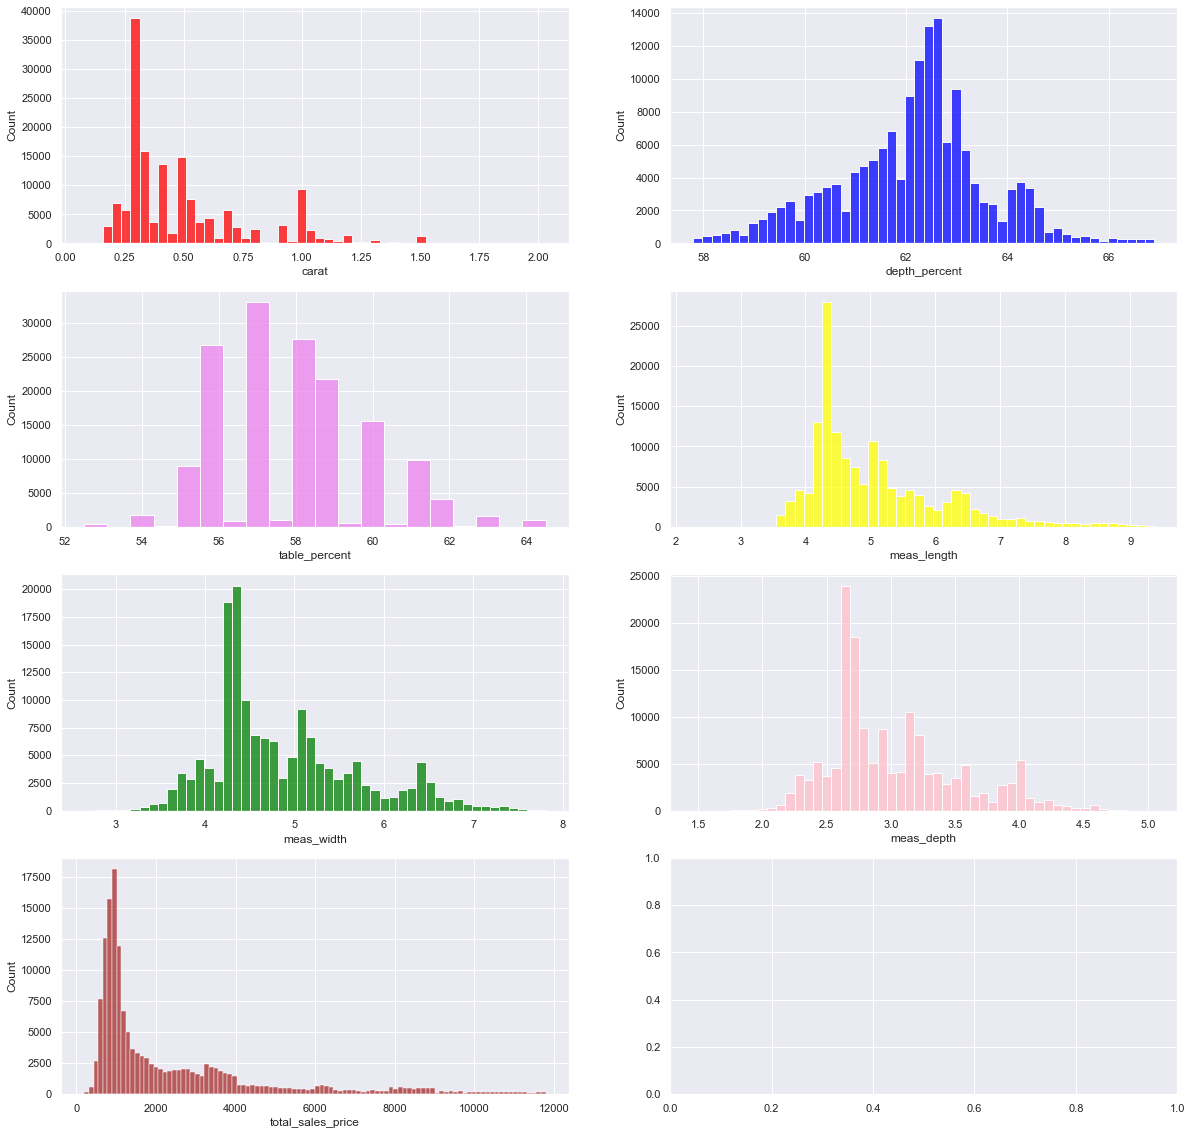

In [4033]:
plt.suptitle('seaborn all')

#displot did not work as subplots so we used histplots

fig, ax = plt.subplots(4,2,figsize = (20,20))
sns.histplot((diamonds_numerical['carat']), color="red", bins=50, ax=ax[0,0])
sns.histplot((diamonds_numerical['depth_percent']), color="blue", bins=50,ax=ax[0,1])
sns.histplot((diamonds_numerical['table_percent']), color="violet", bins=20,ax=ax[1,0])
sns.histplot((diamonds_numerical['meas_length']), color="yellow", bins=50,ax=ax[1,1])
sns.histplot((diamonds_numerical['meas_width']), color="green", bins=50,ax=ax[2,0])
sns.histplot((diamonds_numerical['meas_depth']), color="pink", bins=50,ax=ax[2,1])
sns.histplot((diamonds_numerical['total_sales_price']), color="brown", bins=100,ax=ax[3,0])

sns.set(rc = {'figure.figsize':(15,8)})


### Heatmaps to check correlations between numerical values

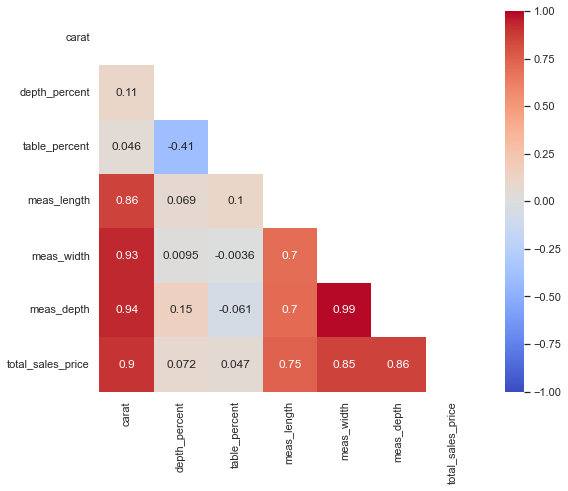

In [4034]:
corr = diamonds_numerical.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [4035]:
# correlations values

diamonds_numerical.corr().round(2)

,carat,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
carat,1.00,0.11,0.05,0.86,0.93,0.94,0.90
depth_percent,0.11,1.00,-0.41,0.07,0.01,0.15,0.07
table_percent,0.05,-0.41,1.00,0.10,-0.00,-0.06,0.05
meas_length,0.86,0.07,0.10,1.00,0.70,0.70,0.75
meas_width,0.93,0.01,-0.00,0.70,1.00,0.99,0.85
meas_depth,0.94,0.15,-0.06,0.70,0.99,1.00,0.86
total_sales_price,0.90,0.07,0.05,0.75,0.85,0.86,1.00


### Data BoxPlotting

#### Replacement of categorical to numerical values

In [4036]:
# copy the diamonds data frame
diamonds_replace_cat = diamonds.copy()

diamonds_replace_cat['clarity'].replace(['I3','I2','I1','SI3','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'], [11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1], inplace=True)
diamonds_replace_cat['color'].replace(['M', 'L', 'K', 'J', 'I', 'H', 'G', 'F', 'E', 'D'], [10, 9, 8, 7, 6, 5, 4, 3, 2, 1], inplace=True)
diamonds_replace_cat['fluor_intensity'].replace(['None','Faint', 'Very Slight', 'Slight', 'Medium', 'Strong', 'Very Strong'], [0, 1, 2, 3, 4, 5, 6], inplace=True)
diamonds_replace_cat['symmetry'].replace(['Excellent','Very Good','Good','Fair','Poor'], [1, 2, 3, 4, 5], inplace=True)
diamonds_replace_cat['polish'].replace(['Excellent','Very Good','Good','Fair', 'Poor'], [1, 2, 3, 4, 5], inplace=True)
diamonds_replace_cat['girdle_min'].replace(['XTN', 'VTN', 'TN', 'STN', 'M', 'STK', 'TK', 'VTK', 'XTK'], [1, 2, 3, 4, 5, 6, 7, 8, 9], inplace=True)
diamonds_replace_cat['girdle_max'].replace(['XTN', 'VTN', 'TN', 'STN', 'M', 'STK', 'TK', 'VTK', 'XTK'], [1, 2, 3, 4, 5, 6, 7, 8, 9], inplace=True)
diamonds_replace_cat['culet_size'].replace(['N','VS','S','M','SL','L','VL','EL'], [1, 2, 3, 4, 5, 6, 7, 8], inplace=True)
diamonds_replace_cat['shape'].replace(['Princess', 'Cushion', 'Heart', 'Pear', 'Oval', 'Marquise', 'Emerald', 'Radiant', 'Cushion Modified', 'Asscher', 'Round'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], inplace=True)
diamonds_replace_cat['cut'].replace(['Fair', 'Good', 'Very Good', 'Excellent', 'Ideal'], [5, 4, 3, 2, 1], inplace=True)


diamonds_replace_cat

,shape,carat,clarity,cut,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,culet_size,eye_clean,color,fluor_intensity,total_sales_price
0,11,0.09,3,2.0,2,2,62.7,59.0,2.85,2.87,1.79,5.0,5.0,1.0,NaN,2.0,0.0,200
1,11,0.09,3,3.0,2,2,61.9,59.0,2.84,2.89,1.78,6.0,6.0,1.0,NaN,2.0,0.0,200
2,11,0.09,3,2.0,2,2,61.1,59.0,2.88,2.90,1.77,3.0,5.0,NaN,NaN,2.0,0.0,200
3,11,0.09,3,2.0,2,2,62.0,59.0,2.86,2.88,1.78,5.0,6.0,NaN,NaN,2.0,0.0,200
4,11,0.09,3,3.0,2,1,64.9,58.5,2.79,2.83,1.82,6.0,6.0,1.0,NaN,2.0,0.0,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193895,11,1.51,7,2.0,1,1,61.0,56.0,7.36,7.41,4.50,3.0,5.0,1.0,NaN,6.0,4.0,11791
193896,11,1.51,7,2.0,1,1,61.0,60.0,7.41,7.44,4.53,5.0,6.0,1.0,NaN,6.0,1.0,11791
193900,11,1.51,7,3.0,1,1,63.9,57.0,7.12,7.17,4.56,NaN,NaN,NaN,NaN,6.0,0.0,11791
193902,11,1.08,5,2.0,1,1,62.7,57.0,6.54,6.55,4.10,NaN,NaN,NaN,Yes,2.0,0.0,11791


<AxesSubplot:xlabel='color', ylabel='total_sales_price'>

<Figure size 1080x576 with 0 Axes>

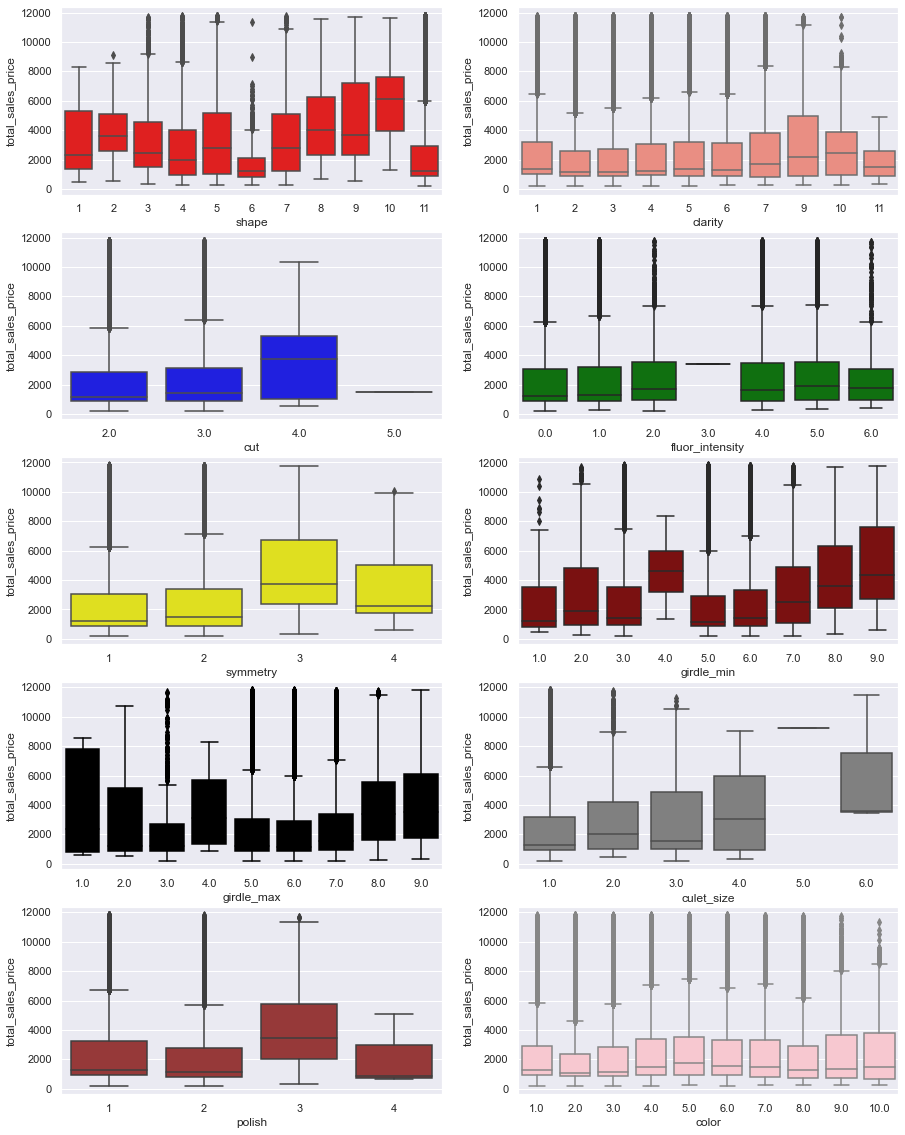

In [4037]:
# boxplotting the features by total_sales_price with the order in numer scale as shown above 

plt.suptitle('all')


fig, ax = plt.subplots(5,2,figsize = (15,20))


sns.boxplot(y=diamonds_replace_cat['total_sales_price'],x=diamonds_replace_cat['shape'], color="red", ax=ax[0,0])
sns.boxplot(y=diamonds_replace_cat['total_sales_price'],x=diamonds_replace_cat['clarity'], color="salmon", ax=ax[0,1])
sns.boxplot(y=diamonds_replace_cat['total_sales_price'],x=diamonds_replace_cat['cut'], color="blue", ax=ax[1,0])
sns.boxplot(y=diamonds_replace_cat['total_sales_price'],x=diamonds_replace_cat['fluor_intensity'], color="green", ax=ax[1,1])
sns.boxplot(y=diamonds_replace_cat['total_sales_price'],x=diamonds_replace_cat['symmetry'], color="yellow", ax=ax[2,0])
sns.boxplot(y=diamonds_replace_cat['total_sales_price'],x=diamonds_replace_cat['girdle_min'], color="darkred", ax=ax[2,1])
sns.boxplot(y=diamonds_replace_cat['total_sales_price'],x=diamonds_replace_cat['girdle_max'], color="black", ax=ax[3,0])
sns.boxplot(y=diamonds_replace_cat['total_sales_price'],x=diamonds_replace_cat['culet_size'], color="grey", ax=ax[3,1])
sns.boxplot(y=diamonds_replace_cat['total_sales_price'],x=diamonds_replace_cat['polish'], color="brown", ax=ax[4,0])
sns.boxplot(y=diamonds_replace_cat['total_sales_price'],x=diamonds_replace_cat['color'], color="pink", ax=ax[4,1])



<Figure size 1080x576 with 0 Axes>

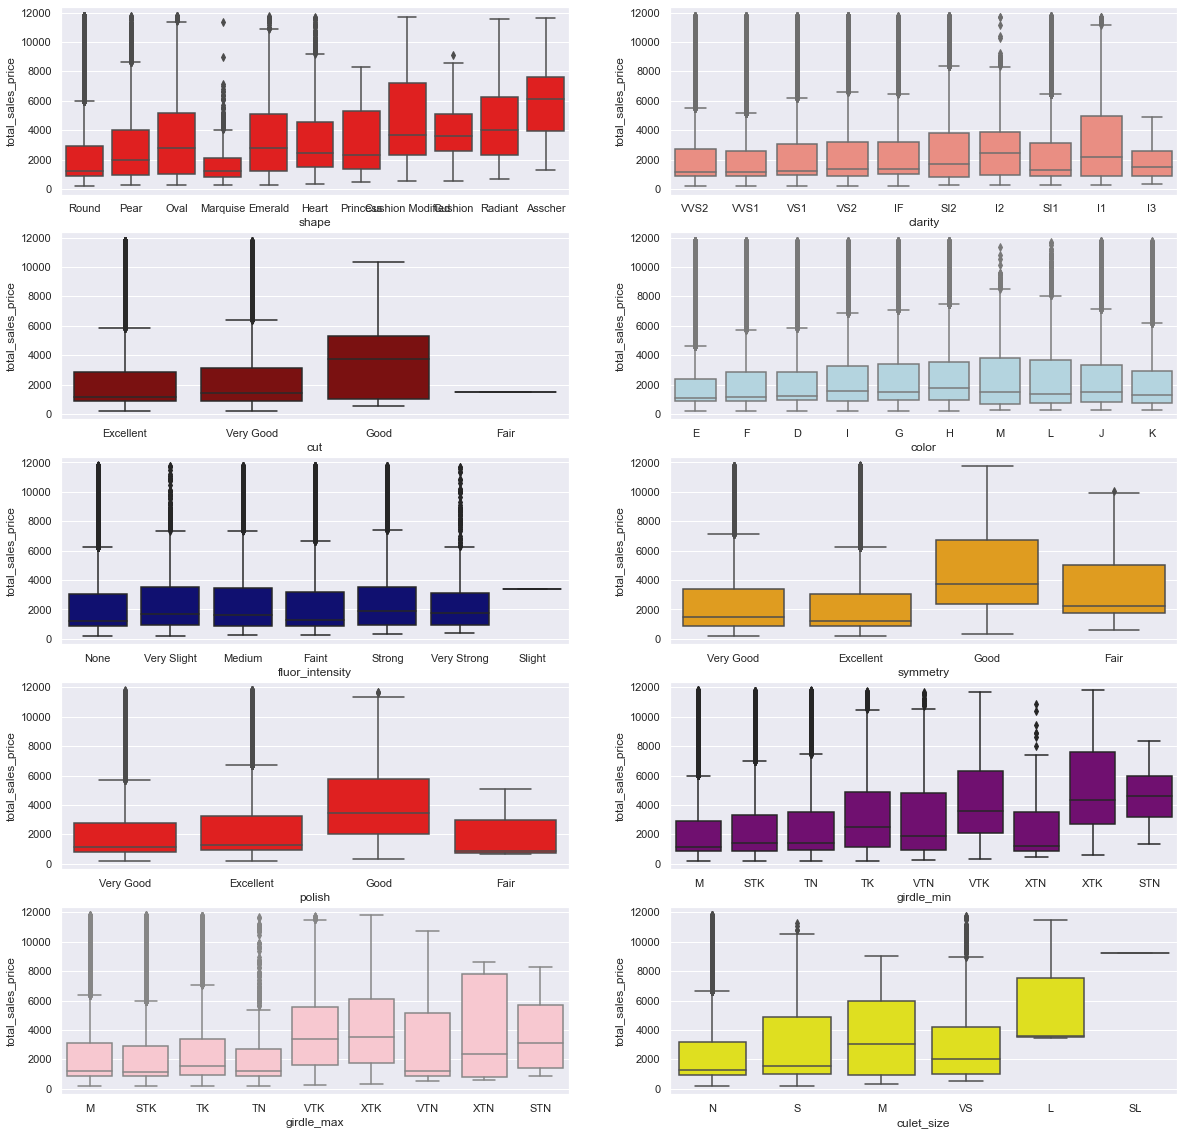

In [4038]:
# plots keeping categorical with original titles

plt.suptitle('seaborn all')


fig, ax = plt.subplots(5,2,figsize = (20,20))
sns.boxplot(y=diamonds['total_sales_price'],x=diamonds['shape'], color='red', ax=ax[0,0])
sns.boxplot(y=diamonds['total_sales_price'],x=diamonds['clarity'], color='salmon', ax=ax[0,1])
sns.boxplot(y=diamonds['total_sales_price'],x=diamonds['cut'], color='darkred', ax=ax[1,0])
sns.boxplot(y=diamonds['total_sales_price'],x=diamonds['color'], color='lightblue', ax=ax[1,1])
sns.boxplot(y=diamonds['total_sales_price'],x=diamonds['fluor_intensity'], color='navy', ax=ax[2,0])
sns.boxplot(y=diamonds['total_sales_price'],x=diamonds['symmetry'], color='orange', ax=ax[2,1])
sns.boxplot(y=diamonds['total_sales_price'],x=diamonds['polish'], color='red', ax=ax[3,0])
sns.boxplot(y=diamonds['total_sales_price'],x=diamonds['girdle_min'], color='purple', ax=ax[3,1])
sns.boxplot(y=diamonds['total_sales_price'],x=diamonds['girdle_max'], color='pink', ax=ax[4,0])
sns.boxplot(y=diamonds['total_sales_price'],x=diamonds['culet_size'], color='yellow', ax=ax[4,1])

plt.show()

<AxesSubplot:xlabel='shape', ylabel='total_sales_price'>

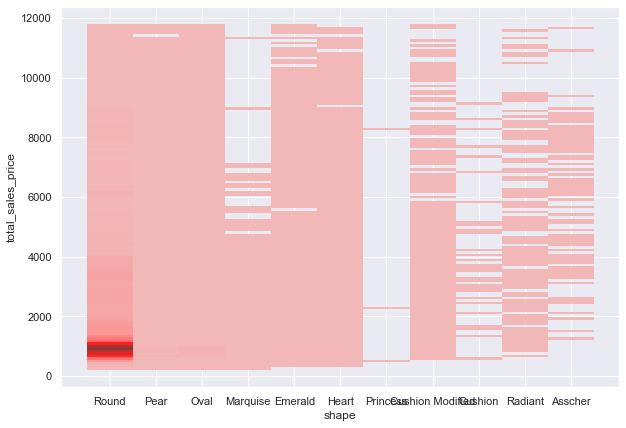

In [4039]:
plt.figure(figsize=(10,7))
sns.histplot(y=diamonds['total_sales_price'],x=diamonds['shape'], color='red')

### Getting dummys from categorical values and drop the first column

In [4040]:
# select categorical values

diamonds_cat = diamonds.select_dtypes('object')
diamonds_cat

,shape,clarity,cut,symmetry,polish,girdle_min,girdle_max,culet_size,eye_clean,color,fluor_intensity
0,Round,VVS2,Excellent,Very Good,Very Good,M,M,N,NaN,E,None
1,Round,VVS2,Very Good,Very Good,Very Good,STK,STK,N,NaN,E,None
2,Round,VVS2,Excellent,Very Good,Very Good,TN,M,NaN,NaN,E,None
3,Round,VVS2,Excellent,Very Good,Very Good,M,STK,NaN,NaN,E,None
4,Round,VVS2,Very Good,Very Good,Excellent,STK,STK,N,NaN,E,None
...,...,...,...,...,...,...,...,...,...,...,...
193895,Round,SI2,Excellent,Excellent,Excellent,TN,M,N,NaN,I,Medium
193896,Round,SI2,Excellent,Excellent,Excellent,M,STK,N,NaN,I,Faint
193900,Round,SI2,Very Good,Excellent,Excellent,NaN,NaN,NaN,NaN,I,None
193902,Round,VS2,Excellent,Excellent,Excellent,NaN,NaN,NaN,Yes,E,None


In [4041]:
# get the dummies and use drop_first=True to reduce the data volume dropping the first colums.

diamonds_dummy = pd.get_dummies(diamonds_cat, drop_first=True)
diamonds_dummy

,shape_Cushion,shape_Cushion Modified,shape_Emerald,shape_Heart,shape_Marquise,shape_Oval,shape_Pear,shape_Princess,shape_Radiant,shape_Round,...,color_J,color_K,color_L,color_M,fluor_intensity_Medium,fluor_intensity_None,fluor_intensity_Slight,fluor_intensity_Strong,fluor_intensity_Very Slight,fluor_intensity_Very Strong
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193895,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
193896,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
193900,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
193902,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


## Modelling

### Split the Numerical Data in X and y, train and test sets

In [4042]:
X_num = diamonds_numerical.drop('total_sales_price', axis=1)
y_num = diamonds_numerical.total_sales_price

X_num

,carat,depth_percent,table_percent,meas_length,meas_width,meas_depth
0,0.09,62.7,59.0,2.85,2.87,1.79
1,0.09,61.9,59.0,2.84,2.89,1.78
2,0.09,61.1,59.0,2.88,2.90,1.77
3,0.09,62.0,59.0,2.86,2.88,1.78
4,0.09,64.9,58.5,2.79,2.83,1.82
...,...,...,...,...,...,...
193895,1.51,61.0,56.0,7.36,7.41,4.50
193896,1.51,61.0,60.0,7.41,7.44,4.53
193900,1.51,63.9,57.0,7.12,7.17,4.56
193902,1.08,62.7,57.0,6.54,6.55,4.10


In [4043]:
y_num

0           200
1           200
2           200
3           200
4           200
          ...  
193895    11791
193896    11791
193900    11791
193902    11791
193903    11791
Name: total_sales_price, Length: 155718, dtype: int64

In [4044]:
X_num_train, X_num_test, y_num_train, y_num_test = train_test_split(X_num, y_num, test_size=.30,random_state=123)

# test_size=.30  -> indicates that the test_set will be 30% or the samples and the training_set 70%.

In [4045]:
X_num_train.shape

(109002, 6)

In [4046]:
X_num_test.shape

(46716, 6)

In [4047]:
X_num_train

,carat,depth_percent,table_percent,meas_length,meas_width,meas_depth
94823,0.32,62.3,58.0,4.38,4.40,2.73
146217,0.61,62.8,58.0,5.38,5.41,3.39
24910,0.30,61.5,57.0,4.28,4.32,2.64
185218,1.01,60.6,60.0,6.41,6.43,3.89
140437,0.70,59.6,61.0,5.72,5.74,3.41
...,...,...,...,...,...,...
179205,1.00,65.4,59.0,5.81,6.55,4.29
139626,0.71,63.4,60.0,8.25,4.70,2.98
20380,0.30,62.6,57.0,4.24,4.28,2.66
31693,0.40,62.5,56.0,4.66,4.68,2.92


### Standardize the numerical values

In [4048]:

std_scaler = StandardScaler().fit(X_num_train)       # it calculates the z score.

X_num_train_scaled = std_scaler.transform(X_num_train)   # transforming the data: normalization of all data. 


X_num_test_scaled = std_scaler.transform(X_num_test)



### Transforming the arrays resulting from the standardization in DataFrames

In [4049]:
X_num_train_scaled = pd.DataFrame(X_num_train_scaled, columns=X_num.columns, index=X_num_train.index)
X_num_train_scaled

# columns=X_num.columns    ---> to keep the name of the columns.
# index=X_num_train.index  ---> to keep the original index.

,carat,depth_percent,table_percent,meas_length,meas_width,meas_depth
94823,-0.647348,0.110189,0.034419,-0.659544,-0.573563,-0.561288
146217,0.384012,0.445319,0.034419,0.293064,0.660116,0.726325
24910,-0.718477,-0.426020,-0.479366,-0.754804,-0.671280,-0.736872
185218,1.806579,-1.029254,1.061989,1.274250,1.906009,1.701791
140437,0.704090,-1.699515,1.575774,0.616951,1.063199,0.765344
...,...,...,...,...,...,...
179205,1.771014,2.187997,0.548204,0.702686,2.052585,2.482163
139626,0.739654,0.847476,1.061989,3.027049,-0.207124,-0.073556
20380,-0.718477,0.311267,-0.479366,-0.792909,-0.720139,-0.697854
31693,-0.362835,0.244241,-0.993151,-0.392813,-0.231553,-0.190612


In [4050]:
X_num_test_scaled  = pd.DataFrame(X_num_test_scaled, columns=X_num.columns, index=X_num_test.index)
X_num_test_scaled

,carat,depth_percent,table_percent,meas_length,meas_width,meas_depth
165694,1.806579,0.311267,-0.993151,1.255198,1.906009,1.935902
115539,0.348448,0.981528,0.548204,0.169225,0.501325,0.648288
108831,-0.007194,-1.163307,0.548204,0.073964,0.354750,0.180065
21097,-0.967426,-0.157915,-2.020720,0.102543,-1.709524,-1.692828
186515,3.549222,-0.358994,1.061989,2.150649,3.066400,2.950386
...,...,...,...,...,...,...
142914,0.704090,3.193388,2.603344,1.074203,-0.830070,-0.424723
64473,-0.540656,0.378293,-0.479366,-0.592861,-0.463631,-0.424723
81364,-0.611784,-0.090889,0.548204,-0.621439,-0.524704,-0.522270
19654,-0.718477,0.445319,-0.993151,-0.773856,-0.744568,-0.658835


### Split the Categorical-Dummy values in train and test sets.

In [4051]:
X_cat = diamonds_dummy

X_cat

,shape_Cushion,shape_Cushion Modified,shape_Emerald,shape_Heart,shape_Marquise,shape_Oval,shape_Pear,shape_Princess,shape_Radiant,shape_Round,...,color_J,color_K,color_L,color_M,fluor_intensity_Medium,fluor_intensity_None,fluor_intensity_Slight,fluor_intensity_Strong,fluor_intensity_Very Slight,fluor_intensity_Very Strong
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193895,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
193896,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
193900,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
193902,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [4052]:
X_cat_train, X_cat_test = train_test_split(X_cat, test_size=.30,random_state=123)
X_cat_test

,shape_Cushion,shape_Cushion Modified,shape_Emerald,shape_Heart,shape_Marquise,shape_Oval,shape_Pear,shape_Princess,shape_Radiant,shape_Round,...,color_J,color_K,color_L,color_M,fluor_intensity_Medium,fluor_intensity_None,fluor_intensity_Slight,fluor_intensity_Strong,fluor_intensity_Very Slight,fluor_intensity_Very Strong
165694,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
115539,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
108831,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
21097,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
186515,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142914,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
64473,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
81364,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
19654,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [4053]:
X_cat_train

,shape_Cushion,shape_Cushion Modified,shape_Emerald,shape_Heart,shape_Marquise,shape_Oval,shape_Pear,shape_Princess,shape_Radiant,shape_Round,...,color_J,color_K,color_L,color_M,fluor_intensity_Medium,fluor_intensity_None,fluor_intensity_Slight,fluor_intensity_Strong,fluor_intensity_Very Slight,fluor_intensity_Very Strong
94823,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
146217,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
24910,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
185218,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
140437,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179205,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
139626,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
20380,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
31693,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0


### Concatinate numerical and categorical X sets

In [4054]:
X_train = pd.concat([X_num_train_scaled, X_cat_train], axis=1)
X_train

,carat,depth_percent,table_percent,meas_length,meas_width,meas_depth,shape_Cushion,shape_Cushion Modified,shape_Emerald,shape_Heart,...,color_J,color_K,color_L,color_M,fluor_intensity_Medium,fluor_intensity_None,fluor_intensity_Slight,fluor_intensity_Strong,fluor_intensity_Very Slight,fluor_intensity_Very Strong
94823,-0.647348,0.110189,0.034419,-0.659544,-0.573563,-0.561288,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
146217,0.384012,0.445319,0.034419,0.293064,0.660116,0.726325,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
24910,-0.718477,-0.426020,-0.479366,-0.754804,-0.671280,-0.736872,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
185218,1.806579,-1.029254,1.061989,1.274250,1.906009,1.701791,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
140437,0.704090,-1.699515,1.575774,0.616951,1.063199,0.765344,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179205,1.771014,2.187997,0.548204,0.702686,2.052585,2.482163,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
139626,0.739654,0.847476,1.061989,3.027049,-0.207124,-0.073556,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
20380,-0.718477,0.311267,-0.479366,-0.792909,-0.720139,-0.697854,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
31693,-0.362835,0.244241,-0.993151,-0.392813,-0.231553,-0.190612,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [4055]:
X_test = pd.concat([X_num_test_scaled, X_cat_test],axis=1)
X_test

,carat,depth_percent,table_percent,meas_length,meas_width,meas_depth,shape_Cushion,shape_Cushion Modified,shape_Emerald,shape_Heart,...,color_J,color_K,color_L,color_M,fluor_intensity_Medium,fluor_intensity_None,fluor_intensity_Slight,fluor_intensity_Strong,fluor_intensity_Very Slight,fluor_intensity_Very Strong
165694,1.806579,0.311267,-0.993151,1.255198,1.906009,1.935902,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
115539,0.348448,0.981528,0.548204,0.169225,0.501325,0.648288,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
108831,-0.007194,-1.163307,0.548204,0.073964,0.354750,0.180065,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
21097,-0.967426,-0.157915,-2.020720,0.102543,-1.709524,-1.692828,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
186515,3.549222,-0.358994,1.061989,2.150649,3.066400,2.950386,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142914,0.704090,3.193388,2.603344,1.074203,-0.830070,-0.424723,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
64473,-0.540656,0.378293,-0.479366,-0.592861,-0.463631,-0.424723,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
81364,-0.611784,-0.090889,0.548204,-0.621439,-0.524704,-0.522270,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
19654,-0.718477,0.445319,-0.993151,-0.773856,-0.744568,-0.658835,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### Modeling using Statsmodels

OLS Regression 

In [4056]:
X_train_const = sm.add_constant(X_train)     # adding a constant

model = sm.OLS(y_num_train, X_train_const).fit()
predictions_train = model.predict(X_train_const) 

X_test_const = sm.add_constant(X_test)       # adding a constant
predictions_test = model.predict(X_test_const) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:      total_sales_price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                 1.398e+04
Date:                Thu, 21 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:07:37   Log-Likelihood:            -8.7401e+05
No. Observations:              109002   AIC:                         1.748e+06
Df Residuals:                  108929   BIC:                         1.749e+06
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [4057]:
# additional linear regression model you could check: lasso, ridge

### Modeling using Scikit Learn

In [4058]:

model = LinearRegression()            # model
model.fit(X_train, y_num_train)       # model train

LinearRegression()

In [4059]:
model.coef_

array([ 2.55487185e+03,  5.51343501e+01,  2.96870389e+00, -5.98417197e+02,
        1.03307363e+03, -6.83015973e+02, -2.67366329e+02,  1.63538925e+02,
        6.57248429e+02, -5.04743737e+02,  2.16988790e+03,  1.08967196e+03,
        1.51048542e+03,  2.14900436e+03,  1.13488920e+02,  6.92453824e+02,
       -9.14307904e+02, -1.38825528e+03,  1.76445329e+03,  1.09688597e+03,
        7.06177370e+02,  1.49267127e+03,  1.38492503e+03,  1.66921308e+03,
        1.56160217e+03, -3.17585056e+03, -1.17599629e+03, -5.60930942e+01,
        1.08666818e+03,  6.74254019e+02, -2.70274674e+01, -1.23089811e+03,
        6.21436237e+02, -1.51198345e+01,  1.74312454e+01,  1.06042746e+02,
       -3.95056947e+01,  7.51478294e+01, -3.58668668e+01,  3.78202637e+01,
        5.00252012e+02,  4.75841491e+00,  3.00740184e+01,  1.61508704e+02,
        1.71377190e+01, -5.13397774e+01,  8.87505254e+00,  1.22148123e+02,
        1.86259195e+02,  5.98834695e+02, -1.48181619e+02,  6.78901134e+01,
        2.16665860e+01, -

In [4060]:
model.intercept_

809.9984629098569

#### Model prediction

In [4061]:

y_pred = model.predict(X_test)          

y_pred_train = model.predict(X_train)
y_pred_train

array([1820.58832038, 3605.21396406,  599.82152843, ...,  463.21878975,
        417.02569755,  753.56915537])

In [4062]:
residual = y_num_test - y_pred
residual

165694   -258.664511
115539   -954.224627
108831   -116.720428
21097     385.891296
186515   -438.305475
             ...    
142914    -15.743498
64473    -256.242568
81364    -204.369556
19654     360.131456
76920    -460.073032
Name: total_sales_price, Length: 46716, dtype: float64

In [4063]:
result=pd.DataFrame({"y_test":y_num_test,"y_pred":y_pred})

#### R2 and Adjusted R2

In [4064]:
R2=r2_score(y_num_test,y_pred)
R2

0.8991832988157804

In [4065]:
adjusted_R2_test = 1 - (1-R2)*(len(y_num_test)-1)/(len(y_num_test)-X_test.shape[1]-1)
adjusted_R2_test


0.8990255092873201

### Making scatter plots of Residuals

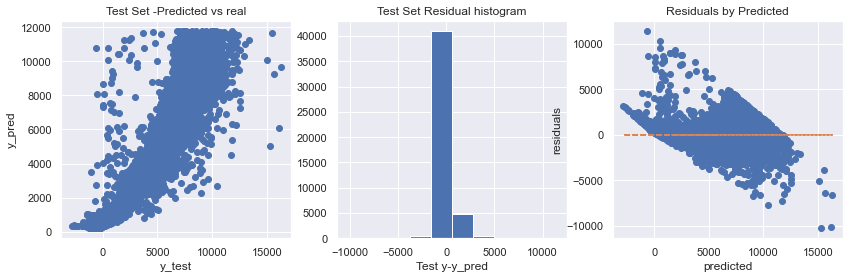

In [4066]:

# scatter plot of y_pred vs y

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_num_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")


# Get a histogram of Test y - y_pred.

ax[1].hist(residual)                             ## residual = (y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")


# scatter plot of residuals by predicted

ax[2].plot(y_pred,residual,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')



### Seaborn Residual Plot 

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

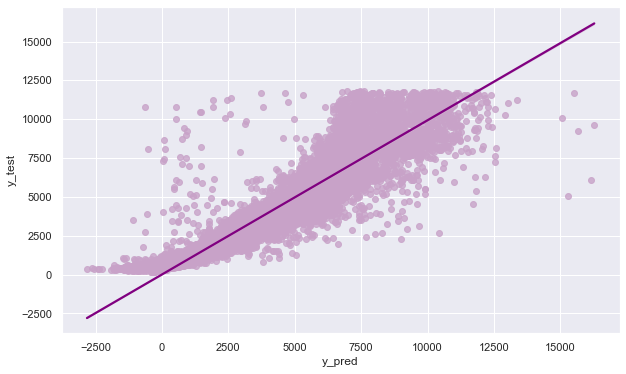

In [4067]:
plt.figure(figsize=(10,6))
        
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "#C8A2C8"}, line_kws={"color": "purple"})

### Calculating MSE and MAE

MSE: Mean Squared Error

MAE: Mean Absolute Error

In [4068]:
# Predictions on the test set

print(mse(y_num_test,y_pred))
print(mae(y_num_test,y_pred))
print(np.sqrt(mse(y_num_test,y_pred))) 

538297.3028256925
441.79040077452737
733.6874694484651


In [4069]:
# Prediction on the train set

mse(y_num_train,y_pred_train)

539710.9381041579

In [4070]:
mae(y_num_train,y_pred_train)

444.8050163514848

In [4071]:
## if the errors in train and test sets are similar the models are ok.

### Features Importance

In [4072]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

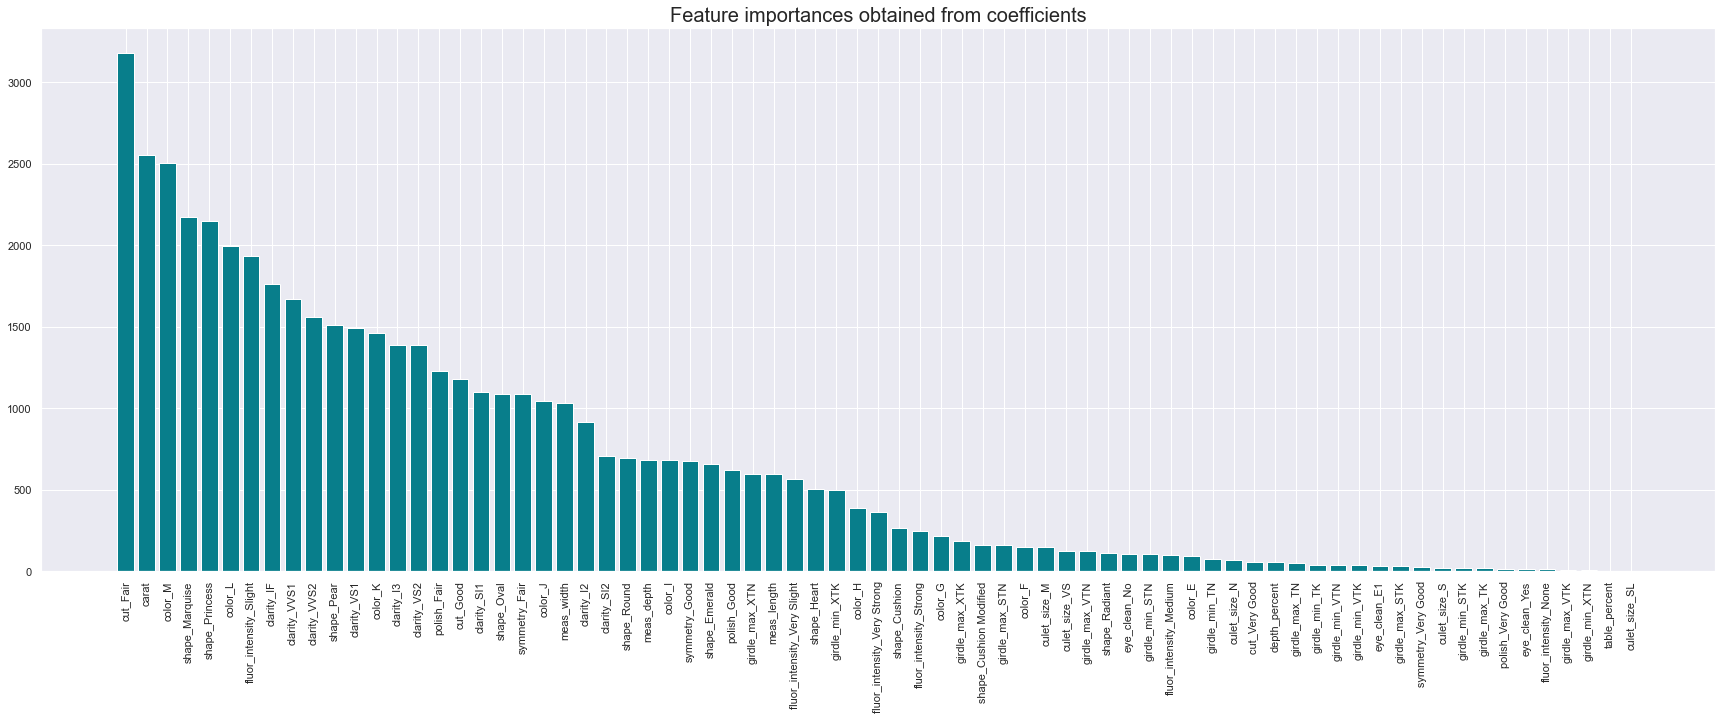

In [4073]:
plt.figure(figsize=(30,10))                              # this one I add to make it smaller
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [4074]:
diamonds.to_csv('diamonds2.csv')

In [3331]:
diamonds3['lab'].to_csv('diamonds_lab.csv')